# Chapter 04 신경망 학습

__학습__ : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

__손실 함수__ : 신경망이 학습할 수 있도록 해주는 지표
>손실 함수의 결괏값을 __가장 작게 만드는 가중치 매개변수__를 찾는 것이 학습의 목표<br>
>by 함수의 기울기를 활용하는 경사법

## 4.1 데이터에서 학습한다!
P.107

__신경망의 특징__ : 가중치 매개변수의 값을 데이터를 보고 자동으로 결정함.

<br>

<이번 장의 목표>
1. 신경망 학습(데이터로부터 매개변수의 값을 정하는 방법)
2. 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드 구현

<br>

※ NOTE_

퍼셉트론
- 선형 분리 문제 - 자동으로 학습 가능
- 비선형 분리 문제 - 자동으로 학습 불가능

### 4.1.1 데이터 주도 학습

기계학습은 데이터가 생명

| __기계학습__ | __신경망(딥러닝)__ |
|-----------------------------|-----------------------------|
| 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾음. | 기계학습보다 사람의 개입을 더욱 배제할 수 있음. |

__기계학습__
- 모아진 데이터로부터 규칙을 찾아내는 역할을 '기계'가 담당
- 이미지를 벡터로 변환할 때 사용하는 특징(feature)은 여전히 '사람'이 설계

__신경망__
- 이미지에 포함된 중요한 __특징까지도 '기계'가 스스로 학습__

<img src='./img/fig 4-2.png' width=500>

※ NOTE_

딥러닝 = 종단간 기계학습(end-to-end machine learning)
- 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻음.

⇒ 신경망은 모든 문제를 주어진 데이터 그대로 입력 데이터로 활용해 'end-to-end'로 학습할 수 있다.

### 4.1.2 훈련 데이터와 시험 데이터

데이터를 __훈련 데이터(training data)와 시험 데이터(test data)로 나눠__ 학습과 실험을 수행
>범용 능력(아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력)을 평가하기 위해서<br>
>즉, '임의의 사람의 임의의 글자'

- __오버피팅__ : 한 데이터셋에만 지나치게 최적화된 상태. (오버피팅을 피해야 함.)

## 4.2 손실 함수
P.111

신경망도 __'하나의 지표'__를 기준으로 최적의 매개변수 값을 탐색함. → __'손실 함수'__
- 일반적으로는 __오차제곱합__과 __교차 엔트로피 오차__를 사용

<br>

※ WARNING_

손실함수 : 신경망 성능의 '나쁨'을 나타내는 지표
- 손실 함수에 마이너스를 곱하면 '좋음'을 나타내는 지표

### 4.2.1 오차제곱합

__오차제곱합(sum of squares for error, SSE)__

$$E = \frac{1}{2} \displaystyle\sum_k (y_k-t_k)^2$$

- $y_k$ : 신경망의 출력(신경망이 추정한 값)
- $t_k$ : 정답 레이블. 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 (원-핫 인코딩)
- $k$ : 데이터의 차원 수

In [2]:
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [7]:
# 정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0]  # 원-핫 인코딩

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

# 예1 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


⇒ 오차가 더 작은 첫 번째 추정 결과가 정답일 가능성이 높다고 판단함.

### 4.2.2 교차 엔트로피 오차

__교차 엔트로피 오차(cross entropy error, CEE)__

$$E = - \sum_k t_k \log{y_k}$$

- $y_k$ : 신경망의 출력(신경망이 추정한 값)
- $t_k$ : 정답 레이블. 정답에 해당하는 인덱스의 원소만 1이고 __나머지는 0__ (원-핫 인코딩)
>실질적으로 __정답일 때__의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식
- $k$ : 데이터의 차원 수
- $\log = \log_e$

<img src='./img/fig 4-3.png' width=500>

In [5]:
def cross_entropy_error(y, t):
    # np.log() 함수에 0을 입력하면 마이너스 무한대가 되므로 마이너스 무한대가 발생하지 않도록 delta를 더해줌.
    delta = 1e-7  # 아주 작은 값
    return -np.sum(t * np.log(y + delta))

In [6]:
# 정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0]

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 예1 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


⇒ 오차가 더 작은 첫 번째 추정 결과가 정답일 가능성이 높다고 판단함.

### 4.2.3 미니배치 학습

훈련 데이터 모두에 대한 손실 함수의 합 구하기

$$E = - \frac{1}{N} \sum_n \sum_k t_{nk} \log{y_{nk}}$$

- N개의 데이터
- $t_{nk}$ : n번째 데이터의 k번째 값
- N으로 나누어 정규화 → __'평균 손실 함수'__
    - 훈련 데이터 개수와 관계없이 통일된 지표
    
<br>

__미니배치__ : 데이터 __일부__를 추려 전체의 '근사치'로 이용 (__미니배치 학습__)
- e.g. 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장만을 사용하여 학습

In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)  # 데이터의 인덱스로 사용
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [10]:
# 0이상 60000 미만의 수 중에서 무작위로 10개를 골라냄.
np.random.choice(60000, 10)

array([29731, 38950, 28983, 46401,   100, 39494, 51809, 33581, 29751,
       48264])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [14]:
# 정답 레이블이 원-핫 인코딩으로 주어졌을 때
def cross_entropy_error(y, t):
    if y.ndim == 1:  # 1차원  # 데이터가 하나인 경우 
        t = t.reshape(1, t.size)  # 2차원
        y = y.reshape(1, y.size)  # 2차원
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [16]:
# 정답 레이블이 숫자 레이블로 주어졌을 때
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 4.2.5 왜 손실 함수를 설정하는가?

신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.

## 4.3 수치 미분
P.121

### 4.3.1 미분

**개선해야 할 점**
1. 반올림 오차
>h = 10$^{-4}$
2. 함수 f의 차분
>(f(x+h) - f(x-h)) / (2*h)

In [1]:
def numerical_diff(f,x):
    h = 1e-4  # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 수치 미분의 예

In [2]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

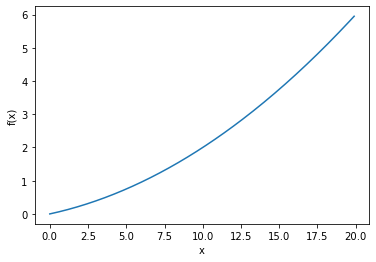

In [4]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 0.1 간격의 배열 x를 만든다(20은 미포함).
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [5]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 4.3.3 편미분

__편미분__ : 변수가 여럿인 함수에 대한 미분

목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정

In [6]:
def function_2(x):
    return x[0]**2 + x[1]**2  # 또는 return np.sum(x**2)

In [7]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [8]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기
P.127

In [9]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val  # 값 복원
        
    return grad

In [10]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


### 4.4.1 경사법(경사 하강법)

### 4.4.2 신경망에서의 기울기

## 4.5 학습 알고리즘 구현하기
P.136

### 4.5.1 2층 신경망 클래스 구현하기

### 4.5.2 미니배치 학습 구현하기

### 4.5.3 시험 데이터로 평가하기